# Assignment 10: Dimensionality Reduction

Dataset(s) needed: MNIST ("Modified National Institute of Standards and Technology") dataset.

In [1]:
#Load the MNIST dataset
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

C:\Users\ricej\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ricej\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


#### Q.1. Split the data into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).


In [4]:
x_tr = mnist['data'][0:60000]
x_te = mnist['data'][60000:]

y_tr = mnist['target'][0:60000]
y_te = mnist['target'][60000:]

#### Q.2. Train a Logistic Regression classifier on the dataset and see how long it takes.

In [9]:
from sklearn.linear_model import LogisticRegression
import time

In [10]:
log_clf = LogisticRegression(solver="lbfgs", max_iter=500, multi_class="multinomial")

In [11]:
start_time = time.time()
log_clf.fit(mnist["data"], mnist["target"])
end_time = time.time()

print("Training took {:.2f}s".format(end_time - start_time))

Training took 88.44s


C:\Users\ricej\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#### Q.3. Evaluate the resulting model on the test set.

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
print("Accurarcy score: {}".format(accuracy_score(y_te, log_clf.predict(x_te))))

Accurarcy score: 0.9449


#### Q.4. Use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.

In [17]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import pandas as pd


In [41]:
pca = PCA()

x_all_pca = pd.DataFrame(pca.fit_transform(mnist['data']))
x_tr_pca = x_all_pca.loc[0:59999,:]
x_te_pca = x_all_pca.loc[60000:,:]

print(x_tr_pca.shape)
print(x_te_pca.shape)

(60000, 784)
(10000, 784)


In [26]:
import numpy as np

In [29]:
print("The number of components that we need in order to execute this model with 95% variance explaned is {}".format(np.sum((pca.explained_variance_ratio_.cumsum() < .95))))

The number of components that we need in order to execute this model with 95% variance explaned is 153


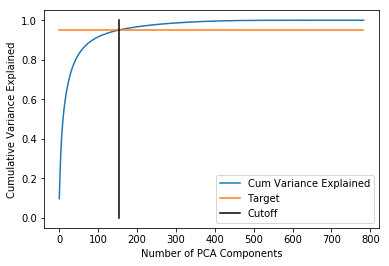

In [66]:
import matplotlib.pyplot as plt
plt.plot(x_all_pca.columns,pca.explained_variance_ratio_.cumsum(),"-", label="Cum Variance Explained")
plt.plot([0, 782], [.95, .95], label="Target")
plt.plot([153,153], [0, 1], label="Cutoff", color="black")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Variance Explained")
plt.legend(loc='lower right')
plt.show()

#### Q.5. Train a new Logistic Regression classifier on the reduced dataset and see how long it takes. Was training much faster? Explain your results

In [42]:
log_clf_pca = LogisticRegression(solver="lbfgs", max_iter=500, multi_class="multinomial")

In [43]:
start_time = time.time()
log_clf_pca.fit(x_tr_pca.iloc[:,:153], y_tr)
end_time = time.time()

print("Training took {:.2f}s".format(end_time - start_time))

Training took 35.99s


C:\Users\ricej\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#### Q.6. Evaluate the new classifier on the test set: how does it compare to the previous classifier? Discuss the speed / accuracy trade-off and in which case you'd prefer a very slight drop in model performance for a x-time speedup in training.

<i> 
The model takes only 153 of the 784 potential features, which is about 20% of the features.  The trade for this was only about a 2% drop in accuracy and a 60% reduction in the amount of time spent.  In this case, the model run time was less than 2 minutes in the worst case, so that is not too terrible.  However, in cases where datasets are much longer and more complex, that difference could mean the difference between weeks and days, which is a tremendous benefit, especially in cases where the trade for the longer run is essentially resulting in an epsilon model.  
</i>

In [44]:
print("Accurarcy score: {}".format(accuracy_score(y_te, log_clf_pca.predict(x_te_pca.iloc[:,:153]))))  #WOW! 

Accurarcy score: 0.9243
